# Entering the Movie Industry

**Authors:** Lhamu Tsering, Justin Fernandez
***

## Overview

The goal of this project is to find information on the traits of success in the movie industry. This information will be used by Microsoft when deciding what kinds of movies to make at their new movie studio.

## Business Problem

The OTT (Over-the-top) video streaming market has grown significantly in the last decade. Major OTT video streaming companies like Netflix, Amazon Prime Video, Hulu, have had much success in not just creating a platform for video streaming, but also creating their own original video content. The market size of the Movie and Video production industry is over $30 billion and Microsoft wants to join in. Without much experience in the field, they need our help with getting an insight into what they should be creating to be the most successful. 

**The questions that we seek to answer are**:
1. What genre of movie is the most successful domestically / worldwide?
2. Who should be hired to give the highest chance of a highly rated movie?
3. What genre of movies are people most excited about voting on ?
4. Are movie ratings affected by movie runtimes ?


**The reason we seek to answer those questions**:
1. For a new company a couple unsuccessful movies could be the demise of their brand and a chance of making it in the market. By creating movies with genres that appeal to the most people you give yourself the highest chance of a positive return on investment.
2. Some actors, directors, and others on the movie set are better than others. Hiring those who are a part of highly rated movies gives you a better chance of creating a good movie. The more experienced the crew the better work that they can create.
3. Most probably than not, a person will only vote on a movie if they have seen it in the first place. For someone to be drawn to watch a movie and then actually go online to the imdb site and vote on it tells us that the movie brought some level of excitement. I wanted to find in what genre do the movies most voted on fall in. For Microsoft this inquiry tells them which genre movies are most popular among movie goers.
4. In knowing whether the time length of a movie affects whether a movie is rated, gives us an idea if people are put off by long movies or not. Based on the data, we can also provide some inference on the ideal time length of a movie. 

## Data Understanding

The data used in this project comes from websites that specialize in movies/tv-shows and all information on those. The websites are Box Office Mojo, IMDb, Rotten Tomatoes, and TheMovieDB.org. In order to get a better understanding I am going to highlight the key components of each dataset.
1. **imdb.title.crew.csv.gz** - This dataset contains the directors and writers for 146,000 movies. (146144 rows × 3 columns)
2. **tmdb.movies.csv.gz** - This dataset conains TMDb information like rating, popularity, and id. Along with that it also has the genres, release date, and title. (26517 rows × 10 columns)
3. **imdb.title.akas.csv.gz** - This dataset contains the titles used in other countries. (331703 rows × 8 columns)
4. **imdb.name.basics.csv.gz** - This dataset contains the employess of the movie and their specfic role. (606648 rows × 6 columns)
5. **rt.reviews.tsv.gz** - This dataset contains the reiews given on Rotten Tomatoes as well as the information about the reviewer. (54432 rows × 8 columns)
6. **imdb.title.basics.csv.gz** - This dataset contains the general infomation on a movie like start year, runtime, and genres. (146144 rows × 6 columns)
7. **rt.movie_info.tsv.gz** - This dataset contains the general information that Rotten Tomatoes provides. This includes a synopsis, rating, genre, directors, and much more. (1560 rows × 12 columns)
8. **tn.movie_budgets.csv.gz** - This dataset contains the budget and gross income. (5782 rows × 6 columns)
9. **bom.movie_gross.csv.gz** - This dataset contains the domestic and foreign gross. (3387 rows × 5 columns)
10. **imdb.title.principals.csv.gz** - This dataset contains information on actors and the movies they were in. (1028186 rows × 6 columns)
11. **imdb.title.ratings.csv.gz** - This dataset contains the movie ratings and the number of votes information from the IMDb site. (73856 rows x 3 columns)

#### Question 1
In order to answer question one, I will be using the **tmdb.movies.csv.gz** and **bom.movie_gross.csv.gz**. The reason for the **tmdb.movies.csv.gz** dataset is to access all movie titles along with their genre ids. The **bom.movie_gross.csv.gz** dataest will be used to access the domestic box office for every movie in that dataset. The **tn.movie_budgets.csv.gz** dataset will be used to access the worldwide box office for every movie in that dataset. Box office is the total amount of money spent at movie theaters to see that movie. These two splices of the dataset will be combined to show the domestic box office per movie which will then be further processed to show box office earnings based on genre.

#### Question 2
In order to answer question two, I will be using the **imdb.name.basics.csv.gz** and **imdb.title.ratings.csv.gz**. The **imdb.name.basics.csv.gz** will be used to access all the employees of movies along with their respective titles they are most known for. The **imdb.title.ratings.csv.gz** will be used to assign ratings to the movies that the employees are most known for. This will allow me to rank crew members based off the ratings off the movies they are most known for.

#### Question 3 and 4

In order to answer questions four and five, the datasets **imdb.title.basics.csv.gz**, **imdb.title.ratings.csv.gz** and the **tmdb.movies.basics.gz** datasets were used. the datasets were merged to produce a single dataset called `movie_ratings_info`, on which all analysis was performed. This dataset includes the movies and their properties that describe it like, movie runtime, movie average rating, the number of voters who voted on the ratings, movie release dates, and the genre the movie belonged to. The dataset has 71097 observations across 11 variables. This compiled data will be further prepared to use for evaluation.

The sample of movies in the dataset are movies that can be found on the IMDb and the TMDb websites and for whom movie rating information was available. The target variable here is the average rating a movie received. The average_rating variable is the average value of the movie ratings information from the two websites. An average rating value is between the range of 1 to 10 where 10 is the highest rating indicating a well approved movie. 

The ratings value from the IMDb site, is calculated by taking a weighted average for ratings provided by all IMDb user, according to the [IMDb](https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#calculate) site. The rating ranges from 1 to 10. 
For rating value from the TMDB site, when users go online on the TMDb site, they get to vote on the movies by how many stars they want to give on a range of 1 to 5. Each star carries two points which bring the vote up to a scale of 1 to 10.  


### Loading pandas libraries and the datasets

The following code will import all the datasets and store them into a dictionary for easy access. This is also where all the normal imports needed for pandas and matplotlib will be done.

In [2]:
# Importing os to get path names for data
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# this will automatically create urls based on the operating system to access data
data_path = os.path.join('data','zippedData')
files = os.listdir(data_path)

In [4]:
import_paths = [os.path.join(data_path,file) for file in files]

In [5]:
data = {}
for path in import_paths:
    try:
        df = pd.read_csv(path) #this will fail on the .tsv
    except:
        df = pd.read_csv(path,delimiter='\t', encoding='unicode_escape') # this will catch the failed
    data[path.split('/')[-1]] = df

***
## Question 1 (a)

What genre of movie is the most successful domestically / worldwide?

### Data Preparation

The first step of this process was to extract the data we needed from the tables and put them into their own dataframes. Next was to merge these two dataframes on the title of the movie so the result would be a table containing `title`, `genre_ids`, and `domestic_gross`.


In [6]:
# getting movie title and genre from the df
id_df = data['tmdb.movies.csv.gz'].loc[:,['genre_ids','original_title']]

# changing column title to be the same with other df
id_df.rename(columns={'original_title':'title'},inplace=True)

# getting the title and gross into sep df
money_df = data['bom.movie_gross.csv.gz'].loc[:,['title','domestic_gross']]

# merging the movie info with the gross income info
money_id_df = money_df.merge(id_df,how='left',on='title') 

The next step was to clean the dataframe so that there were niether duplicates nor NaN's. The data set with `title` and `genre_ids` did contain duplicate movie titles but these were removed as their `genre_ids` were not correct (as opposed to joining them). The next set of drops were to drop NaN's from `genre_ids` and `domestic_gross`. The problem here was that in the **tmdb.movies.csv.gz** dataframe some of the movies did not have `genre_ids` and was not due to the merge. The same problem applies to `domestic_gross` in that the **bom.movie_gross.csv.gz** dataframe did not have `domestic_gross` for all movies. 

In [7]:
# dropping duplicate titles that had wrong id's
money_id_df.drop_duplicates(subset='title',inplace = True)

# getting rid of movies that do not have genres
money_id_df.dropna(subset=['genre_ids'],inplace=True)

# dropping columns that do no have domestic_gross
money_id_df.dropna(subset=['domestic_gross'],inplace=True)

Now that the data is cleaned and stored I am going to change all genre ID's into the genre that they represent.

In [8]:
# this dictonary will conver the IMDb genre id's to their associated english word
genre_id_to_string = {28:'action',
                      16:'animated',
                      99:'documentary',
                      18:'drama',
                      10751:'family',
                      14:'fantasy',
                      36:'history',
                      35:'comedy',
                      10752:'war',
                      80:'crime',
                      10402:'music',
                      9648:'mystery',
                      10749:'romance',
                      878:'sci-fi',
                      27:'horror',
                      10770:'TV-movie',
                      53:'thriller',
                      37:'western',
                      12:'adventure'}

In [9]:
# because genre_ids are stored as a string in between brackets and seperated by commas 
# this function will clean that to return an actual list of real words
# example
# input: '[28,16,99]' (type = string)
# output: [action, animated, documentary] (type = list)
def convert_id_to_name(id_list):
    id_list = id_list[1:-1].replace(',','').split()
    for id in enumerate(id_list):
        id_list[id[0]] = genre_id_to_string[int(id[1])]
    return(id_list)

# applying convert_id_to_name so that the ids are now readable names
money_id_df.genre_ids = money_id_df.genre_ids.apply(lambda x: 'nan' if str(x) == 'nan' else convert_id_to_name(x))

Now that the data is in the correct format the following for loop iteration along with a dictionary was used to iterate through the `genre_ids` and create a key value pair of the genre and a list of the `domestic_gross`that each genre was a part of. For example, if _Avengers_ is classfied as action, fantasy, and adventure and grossed \\$10,000,000 domestically. Those three genres would be assigned \\$10,000,000 to their list. After these lists are created the mean is calculated to show the mean domestic box office of any movie containing that genre.

In [10]:
# dictionary to hold the following key value pairs:
# key = genre, value = total money grossed
money_for_each_genre = {}
for genre_money in money_id_df.iterrows():
    ids = list(genre_money[1])[-1]
    money = list(genre_money[1])[-2]
    if ids != 'nan':
        for id in ids:
            if id in money_for_each_genre.keys():
                money_for_each_genre[id].append(money) 
            else:
                money_for_each_genre[id] = [money]
                
# going through dictionary to take the mean of all movies in a genre
for genre_money in money_for_each_genre.items():
    money_list = genre_money[1]
    money_for_each_genre[genre_money[0]] = int(np.mean(money_list))

The dictionary is then converted back to a dataframe for ease of use with matplotlib. This dataframe was then sorted by domestic box office to have a descending list of domestic box office.

In [11]:
# converting back to dataframe for easy sorting / extraction for graphing
final_dataframe = pd.DataFrame.from_dict(money_for_each_genre,orient='index')
final_dataframe.sort_values(by=0,ascending=False,inplace=True)

### Data Modeling

Text(0, 0.5, 'Gross Domestic Box Office')

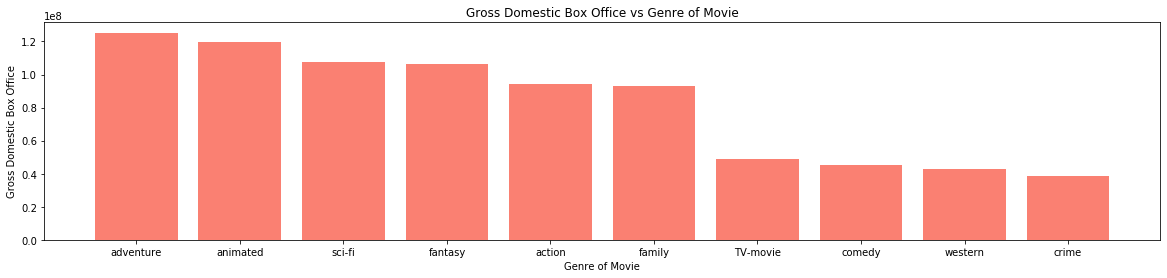

In [12]:
x = final_dataframe.index
y = final_dataframe.iloc[:,0]
x = x[0:10]
y = y[0:10]
fig = plt.figure(figsize = (20,4))
ax = fig.subplots()
ax.bar(x,y,color='salmon')
ax.set_title('Gross Domestic Box Office vs Genre of Movie')
ax.set_xlabel('Genre of Movie')
ax.set_ylabel('Gross Domestic Box Office')


### Evaluation

In the visuatlization of this problem we can see that there are some genres that on average bring in much more money at the box office than others. Adventure, animated, sci-fi, fantasy, action, and family make significantly more money as seen by the massive drop-off from family to TV-movie. This will help Microsoft choose what kind of movies to make from the beggining to maximize their chance of making a profit on their movies. 


***
## Question 1 (b)

In order to further reinforce the insight provided in question 1 (a) I recreated the same work on a different dataset containing domestic and worldwide box office. Almost the same exact process was done except for the use of `worldwide_gross` as opposed to `domestic_gross`.

In [13]:
# get the gross income from domestic and worldwide
tn_money = data['tn.movie_budgets.csv.gz']
tn_money.rename(columns={'movie':'title'},inplace=True)

# get the genre ids
imdb_movies = data['tmdb.movies.csv.gz'].loc[:,['genre_ids','original_title']]
imdb_movies.rename(columns={'original_title':'title'},inplace=True)

# merge the two cells on title
money_for_movies = imdb_movies.merge(tn_money,how='left',on='title') 

# select wanted data
money_for_movies = money_for_movies.loc[:,['title','genre_ids','worldwide_gross']]

# drop columns without a wordlwide gross
money_for_movies.dropna(subset=['worldwide_gross'],inplace=True)

# clean the money columns due to $ and , being used to represent money (ex ten thousand dollars  = $10,000)
def clean_money(money):
    money = money.replace('$','')
    return float(money.replace(',',''))

# cleaning money column
money_for_movies.worldwide_gross = money_for_movies.worldwide_gross.apply(lambda x: clean_money(x))

# converting genre ids to genres
money_for_movies.genre_ids = money_for_movies.genre_ids.apply(lambda x: 'nan' if str(x) == 'nan' else convert_id_to_name(x))

# adding money together based off of genre
world_money = {}
for item in money_for_movies.iterrows():
    ids = list(item[1])[1]
    money = list(item[1])[-1]
    if ids != 'nan':
        for id in ids:
            if id in world_money.keys():
                world_money[id].append(money)
            else:
                world_money[id] = [money]
        
# going through dictionary to take the mean of all movies in a genre
for money_genre in world_money.items():
    money_list = money_genre[1]
    world_money[money_genre[0]] = int(np.mean(money_list))

# creating a DataFrame from the dictionary
output_dataframe = pd.DataFrame.from_dict(world_money, orient='index')

# sorting value based on total box office income
output_dataframe.sort_values(by=0,ascending=False,inplace=True)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Gross Worldwide Box Office')

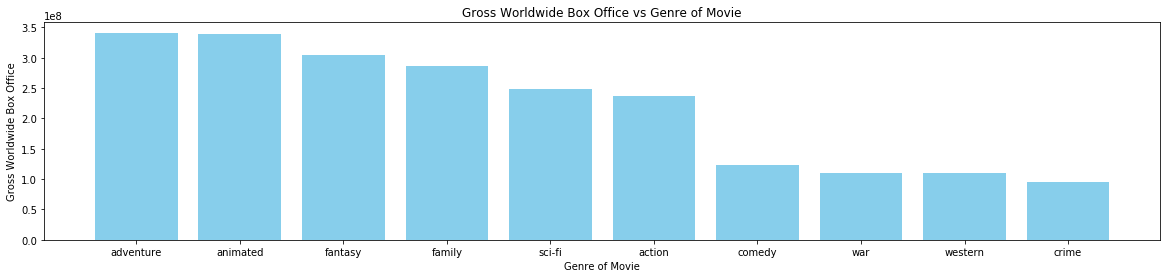

In [15]:
x = output_dataframe.index
y = output_dataframe.iloc[:,0]
x = x[0:10]
y = y[0:10]
fig = plt.figure(figsize = (20,4))
ax = fig.subplots()
ax.bar(x,y,color='skyblue')
ax.set_title('Gross Worldwide Box Office vs Genre of Movie')
ax.set_xlabel('Genre of Movie')
ax.set_ylabel('Gross Worldwide Box Office')


### Evaluation

As we can see almost the same exact 6 genres were vastly higher than all others. The biggest difference here is that animated and adventure movies made vastly more money than all the others as the other top 4 drop signifcantly from the first 2. Due to this being the mean it is affected by outliers but for this specific case it is good to know that some genres like adventure and animated have the chance of making billions where as genres like western and crime have a much lower cap and average.

***
## Question 2

Who should be hired to give the highest chance of a highly rated movie?

### Data Preperation

In order to find out **who** to hire I am going to need to get the ratings of the movies that they were a part of. This is not a perfect representation of their skills but it does give insight into their possibility of contributing to a successful movie. This information is located in the **imdb.title.ratings.csv.gz** data set where I extract the movies (given in tconst) and their respective ratings. This is then converted into a dictionary so that an input of a movie's ID (tconst) will return that movie's rating.

In [16]:
# extracting needed columns of tconst and average rating
movie_rating = data['imdb.title.ratings.csv.gz'][['tconst','averagerating']]

# setting the index to the tconst for ease of translation to dictionary
movie_rating.set_index('tconst',inplace=True)

# creating a dictionary of key value pairs:
# key = tconst
# value = rating
tconst_to_rating = movie_rating.to_dict('index')

Now that the dictionary is created I am going to drop all rows where a name does not have any `know_for_titles` or a `primary_profession`. These names can not be considered because there is no way to assign them a rating or score. If they were assigned a score and do not have a primary profession there is no way to know what they did well.

In [17]:
best_people = data['imdb.name.basics.csv.gz'].dropna(subset=['known_for_titles','primary_profession'])

The below funciton (`change_to_name`) takes a person's `known_for_titles` (which is a string of tconsts seperated by comma) and converts them to the rating that movie recieved

In [18]:
def change_to_name(tconst_string): #x going to be a string 'tt0837562,tt2398241,tt0844471,tt0118553'
    # splitting to have individual tconsts
    tconst_list = tconst_string.split(',')
    rating_list = []
    
    # some tconsts are not in the dataframe so we skip them
    for tconst in tconst_list:
        try:
            #appending this rating to the list
            rating_list.append(tconst_to_rating[tconst]['averagerating'])
        except:
            pass
    
    # taking the mean of all ratings
    if len(rating_list)>0:
        return np.mean(rating_list)
    #if there are no ratings we return NaN
    else:
        return np.nan

In [19]:
# this is to block a strange error with assinging values to data frame splices
pd.options.mode.chained_assignment = None  # default='warn'

This will convert the tconsts into a mean of all ratings of those movies

In [20]:
# input: 'tt0837562,tt2398241,tt0844471,tt0118553' type(string)
# output: 6.0 type(float)
best_people['average_rating'] = best_people['known_for_titles'].apply(change_to_name)

In [21]:
# dropping rows for names who did not have any of their known titles
# match to the ratings database
best_people.dropna(subset=['average_rating'],inplace=True)

The dataframe is then sorted by the ratings that each person recieved. This will allow us to choose those who worked on movies with the highest rating.

In [22]:
best_people = best_people.sort_values('average_rating',ascending=False)

Now that this data is condensed into a single dataframe further indexing is needed in order to find the best actor, writer, etc. This can be done for any profession involved in moving making but the most common are done here.

In [23]:
# best actor
best_actor = best_people[(best_people.primary_profession.str.contains('actor'))]
best_actress = best_people[(best_people.primary_profession.str.contains('actress'))]

# best director
best_director = best_people[(best_people.primary_profession.str.contains('director'))]

# best writer
best_writer = best_people[(best_people.primary_profession.str.contains('writer'))]

### Data Modeling
The most affective way to show **who** should be hired is to show who was the most highly rated.

In [24]:
print('TOP 5 ACTORS')
for item in enumerate(list(best_actor["primary_name"].head(10))):
    print('#{}: {}'.format((item[0]+1),item[1]))

TOP 5 ACTORS
#1: Lance Vogel
#2: Mark Alan Campbell
#3: Seth Michael
#4: Luke Telfer
#5: Benji Riggs
#6: George Hurd
#7: Don McClendon
#8: Carl Piccarreta
#9: Chris Biasizzo
#10: Patrick Blanner


In [25]:
print('TOP 5 ACTRESSES')
for item in enumerate(list(best_actress["primary_name"].head(10))):
    print('#{}: {}'.format((item[0]+1),item[1]))

TOP 5 ACTRESSES
#1: Cristina Duarte
#2: Donna Schulte
#3: Vickie Doerr
#4: Diane Ferranti
#5: Aurora Sharon Lewis
#6: Annabel Spinks-Jones
#7: Jennie Swardh
#8: Aleida Guevara
#9: Mikey Madison
#10: HaleyRae Christian Cannell


In [26]:
print('TOP 5 DIRECTORS')
for item in enumerate(list(best_director["primary_name"].head(10))):
    print('#{}: {}'.format((item[0]+1),item[1]))

TOP 5 DIRECTORS
#1: Cristina Duarte
#2: Michiel Brongers
#3: Masahiro Hayakawa
#4: Daniel Alexander
#5: Vickie Doerr
#6: Loreto Di Cesare
#7: Chad Carpenter
#8: Andrew Jezard
#9: Dante Tanikie-Montagnani
#10: Pablo Arévalo


In [27]:
print('TOP 5 WRITERS')
for item in enumerate(list(best_writer["primary_name"].head(10))):
    print('#{}: {}'.format((item[0]+1),item[1]))

TOP 5 WRITERS
#1: Cristina Duarte
#2: Lance Vogel
#3: Michiel Brongers
#4: Daniel Alexander
#5: Don McClendon
#6: Dante Tanikie-Montagnani
#7: Nick Saporito
#8: Javi Larrauri
#9: Rok Andres
#10: Alicia Karami


### Evaluation

In the lists above we can see those actors/actresses, directors, and writers who worked on movies that recieved the highest ratings. This does not mean that they will produce highly rated content but that they have produced highly rated content in the past. These results can be helpful but they could be much more accurate if more movies were associated with each crew member in the dataset. With some having 4 and others only having 1 it can definitly sway the results if one person happened to work on a smaller film that recived only a small number of rating rather than a bigger film with thousands of reviews. Microsoft can use this information to have a smaller pool of candidates when they are looking to hire.


***
## Question 3 and 4

What genre of movies are people most excited about voting on ?
Are movie ratings affected by movie runtimes ?

### Data Preparation


In preparing the dataset, variables that were duplicates (like the multiple title variables, the duplicate genre variable) were dropped from the final data. There are two variables created to help answer the question; `average_rating` and `number_votes`. 

Some effort was made to salvage any missing rating and voter count information, by replacing the missing values in one column with its corresponding other rating or voter count column.
The `average_rating` variable was then created as a weighted average of the movie ratings information from the two websites. Similarly, the `number_votes` variable was also created as a weighted average of the voter count information from the two websites. Any observation with missing values that affected the target variable `average_rating` and 'number_votes' was also dropped.

Missing movie rating information had to be dropped because keeping it may create noise in the dataset by indicating something that may not be true. Just because a movie has no rating, does not mean the movie was rated 0 or 1. Replacing missing values with the mean or median here, also adds misinformation to the dataset. Hence, observations with missing value for movie rating information was dropped.

The popularity value as calculated on tmdb is based on the volume of interactions, like number of votes, number of users that marked the movie as favorite, number of views etc. This variable does not have any range and the website draws meaning from it mainly through its popularity ranking score per day, which is not very helpful in our analysis. 

In [28]:
# Performing an outer merge of IMDb title basic and title ratings datasets on 
# movie id column, 'tconst'. 
# This is to gather movie information from the IMDb datatsets.
imdb_movie = data['imdb.title.basics.csv.gz'].merge(data['imdb.title.ratings.csv.gz'], how = 'outer', on = 'tconst')

# Performing an outer merge on the IMDB movie dataframe and the TMDB movies 
# dataset to collect movie ratings information in one dataframe
movie_ratings_info = data['tmdb.movies.csv.gz'].merge(imdb_movie, how = 'outer', on = 'original_title')

In [29]:
movie_ratings_info.head(2)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,0.0,"[12, 14, 10751]",12444.0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788.0,tt0926084,Harry Potter and the Deathly Hallows: Part 1,2010.0,146.0,"Adventure,Fantasy,Mystery",7.7,425530.0
1,1.0,"[14, 12, 16, 10751]",10191.0,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610.0,tt0892769,How to Train Your Dragon,2010.0,98.0,"Action,Adventure,Animation",8.1,611299.0


In [30]:
# Dropping columns irrelevant to evaluating target variable; movie ratings
movie_ratings_info.drop(columns = ['Unnamed: 0','id', 'tconst', 'start_year','primary_title', 'title', 'genres', 'popularity'], axis = 1, inplace = True)

# Getting information on datatypes of each of the columns in the dataframe
# and a preview of missing values
movie_ratings_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160208 entries, 0 to 160207
Data columns (total 9 columns):
genre_ids            31925 non-null object
original_language    31925 non-null object
original_title       160187 non-null object
release_date         31925 non-null object
vote_average         31925 non-null float64
vote_count           31925 non-null float64
runtime_minutes      117246 non-null float64
averagerating        76248 non-null float64
numvotes             76248 non-null float64
dtypes: float64(5), object(4)
memory usage: 12.2+ MB


In [31]:
movie_ratings_info.isna().sum()

genre_ids            128283
original_language    128283
original_title           21
release_date         128283
vote_average         128283
vote_count           128283
runtime_minutes       42962
averagerating         83960
numvotes              83960
dtype: int64

In [32]:
movie_ratings_info['genre_ids'] = movie_ratings_info['genre_ids'].apply(lambda x: 'nan' if str(x) == 'nan' else convert_id_to_name(x))

In [33]:
# The two average rating columns; vote_average and average rating are movie
# ratings from two different datasets which I intend to compile to
# one column for each movie. Since vote_average has more missing values, I am 
# replacing with what I can from the average rating column.

movie_ratings_info['vote_average'].where(movie_ratings_info['vote_average'] > 0, other = movie_ratings_info['averagerating'], inplace = True)

In [34]:
movie_ratings_info['vote_count'].where(movie_ratings_info['vote_count'] > 0, other = movie_ratings_info['numvotes'], inplace = True)

In [35]:
movie_ratings_info.isna().sum()

genre_ids                 0
original_language    128283
original_title           21
release_date         128283
vote_average          70010
vote_count            69926
runtime_minutes       42962
averagerating         83960
numvotes              83960
dtype: int64

In [36]:
# Creating a composed movie rating column 'average_rating' which takes on the 
# weighted average of the two rating columns as values  
movie_ratings_info['average_rating'] = (movie_ratings_info['averagerating'] + movie_ratings_info['vote_average'])/2

In [37]:
# Creating a composed number of votes column 'number_votes', which takes on the 
# average of the two vote count columns as values
movie_ratings_info['number_votes'] = (movie_ratings_info['numvotes'] + movie_ratings_info['vote_count'])/2

In [38]:
movie_ratings_info.head(2)

,genre_ids,original_language,original_title,release_date,vote_average,vote_count,runtime_minutes,averagerating,numvotes,average_rating,number_votes
0,"[adventure, fantasy, family]",en,Harry Potter and the Deathly Hallows: Part 1,2010-11-19,7.7,10788.0,146.0,7.7,425530.0,7.7,218159.0
1,"[fantasy, adventure, animated, family]",en,How to Train Your Dragon,2010-03-26,7.7,7610.0,98.0,8.1,611299.0,7.9,309454.5


In [39]:
movie_ratings_info.isna().sum()

genre_ids                 0
original_language    128283
original_title           21
release_date         128283
vote_average          70010
vote_count            69926
runtime_minutes       42962
averagerating         83960
numvotes              83960
average_rating        83960
number_votes          83960
dtype: int64

In [40]:
movie_ratings_info.shape

(160208, 11)

In [41]:
# Dropping observations for which the value of number of votes is null or Nan
movie_ratings_info.dropna(subset = ['number_votes'], inplace = True)

In [42]:
movie_ratings_info.isna().sum()

genre_ids                0
original_language    58357
original_title           0
release_date         58357
vote_average             0
vote_count               0
runtime_minutes       7713
averagerating            0
numvotes                 0
average_rating           0
number_votes             0
dtype: int64

In [43]:
movie_ratings_info.shape

(76248, 11)

In [44]:
# Dropping any duplicate observations or movies in the dataset
movie_ratings_info.drop_duplicates(subset='original_title', inplace = True)

In [45]:
movie_ratings_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71097 entries, 0 to 160194
Data columns (total 11 columns):
genre_ids            71097 non-null object
original_language    13801 non-null object
original_title       71097 non-null object
release_date         13801 non-null object
vote_average         71097 non-null float64
vote_count           71097 non-null float64
runtime_minutes      63771 non-null float64
averagerating        71097 non-null float64
numvotes             71097 non-null float64
average_rating       71097 non-null float64
number_votes         71097 non-null float64
dtypes: float64(7), object(4)
memory usage: 6.5+ MB


In [46]:
movie_ratings_info['genre_ids'].isna().sum()

0

### Data Modeling

To answer the question of genre of movies voted on, I wanted to understand my target variable and how it related to other variables in the dataset.  To do this, I first calculated the descriptive statistics on the data to analyze all relevant variables.

In [47]:
movie_ratings_info.describe()

,vote_average,vote_count,runtime_minutes,averagerating,numvotes,average_rating,number_votes
count,71097.000000,71097.000000,63771.000000,71097.000000,7.109700e+04,71097.000000,71097.000000
mean,6.323973,494.428879,94.661131,6.338775,3.506031e+03,6.331374,2000.229876
std,1.536417,6873.210860,212.512783,1.475228,3.044963e+04,1.472581,16537.437322
min,0.500000,1.000000,3.000000,1.000000,5.000000e+00,0.950000,3.000000
25%,5.400000,9.000000,81.000000,5.500000,1.400000e+01,5.500000,13.000000
50%,6.500000,26.000000,91.000000,6.500000,4.900000e+01,6.500000,44.500000
75%,7.400000,123.000000,104.000000,7.400000,2.800000e+02,7.350000,232.000000
max,10.000000,784780.000000,51420.000000,10.000000,1.841066e+06,10.000000,931626.000000


In [48]:
movie_ratings_info['average_rating'].mode()

0    6.6
dtype: float64

The average `average-rating` for a movie in our sample of movies is 6.33. Most of the movies are rated between 4.85 and 7.80, based on one standard deviation of 1.47 on either side of the average average-rating. The 50th percentile or the median average-rating is 6.5 and the average-rating value for movies occurring the most number of times, or the mode is 6.6. 

Notice, how the mean, median and the mode of the sample `average_rating` is very similar, from which we can guess that the distribution of `average-rating` for movies in the imdb and tmdb sites follow a close to normal distribution. This allows for a good confidence in target variable in our sample to represent movie ratings in the industry.

Similarly, based on our sample the average movie runtime is about 95 minutes.

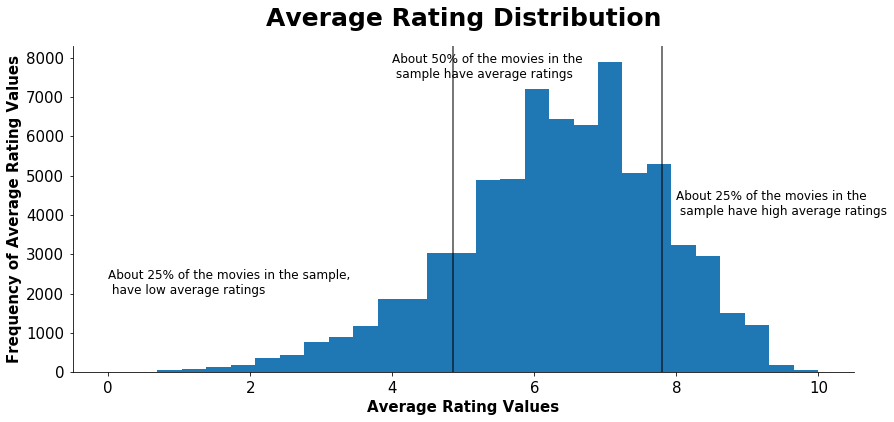

In [49]:
# Generate a figure with a single axis
figure1, ax = plt.subplots(figsize = (14, 6))
#Generate a histogram on the ax
x = movie_ratings_info['average_rating']
ax.hist(x, bins = 29, range = (0, 10))

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Set axes labels
ax.set_xlabel('Average Rating Values', fontsize = 15, weight = 'bold')
ax.set_ylabel('Frequency of Average Rating Values', fontsize = 15, weight = 'bold')
#adjusting tick parameter
ax.tick_params('both', labelsize = 15, pad = 5)
#setting figure title
ax.set_title('Average Rating Distribution', pad = 20, fontsize = 25, weight = 'bold')

# adding vertical lines to create section of data
# 1 std dev on either side of the mean
ax.axvline(4.85, color = 'black', alpha = 0.7)
ax.axvline(7.8, color = 'black', alpha = 0.7)

#Adding text to indicate sample proportions in distribution
ax.text(0,  2000, 'About 25% of the movies in the sample, \n have low average ratings', fontsize = 12)
ax.text(4, 7500, 'About 50% of the movies in the \n sample have average ratings', fontsize = 12)
ax.text(8, 4000, 'About 25% of the movies in the \n sample have high average ratings', fontsize = 12)

plt.show();

In [50]:
movie_ratings_info.corr()

,vote_average,vote_count,runtime_minutes,averagerating,numvotes,average_rating,number_votes
vote_average,1.000000,0.021686,-0.006521,0.912639,0.030176,0.978814,0.032288
vote_count,0.021686,1.000000,0.008666,0.022458,0.285556,0.022562,0.470698
runtime_minutes,-0.006521,0.008666,1.000000,-0.007132,0.012249,-0.006988,0.013079
averagerating,0.912639,0.022458,-0.007132,1.000000,0.044023,0.976999,0.045196
numvotes,0.030176,0.285556,0.012249,0.044023,1.000000,0.037794,0.979968
average_rating,0.978814,0.022562,-0.006988,0.976999,0.037794,1.000000,0.039482
number_votes,0.032288,0.470698,0.013079,0.045196,0.979968,0.039482,1.000000


To understand whether average rating for a movie changed with as the number of voters on a movie was higher or lower. On running a correlation test and plotting the two variables using a scatterplot, I found that average rating for a movie was not much affected by how many people voted on the movie. 

From the figure you can see how most of the observations cluster low and flat and then lean very slightly to the right as it slopes upwards, the average rating increasing as the number of voters for a movie increases. You could almost say that there is no correlation between the two variables. The correlation value between the two variables is a positive 0.039. No matter how many people vote on a movie, the average rating for that movie rarely changes.

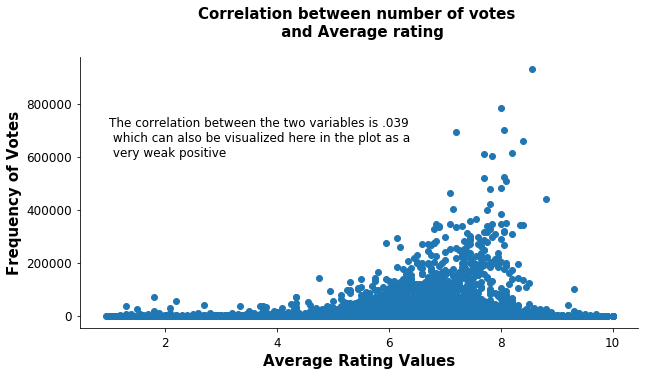

In [51]:
# Generating Figure
figure2, ax = plt.subplots(figsize = (10,5))
# Generating scatter plot to preview variable relationship
x = movie_ratings_info['average_rating']
y = movie_ratings_info['number_votes']
ax.scatter(x,y)

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Set axes labels
ax.set_xlabel('Average Rating Values', fontsize = 15, weight = 'bold')
ax.set_ylabel('Frequency of Votes', fontsize = 15, weight = 'bold')

#adjusting tick parameter
ax.tick_params('both', labelsize = 12, pad = 5)

#setting figure title
ax.set_title('Correlation between number of votes \n and Average rating', pad = 20, fontsize = 15, weight = 'bold')

# adding text to axes explaining correlation
ax.text(1, 600000, 'The correlation between the two variables is .039 \n which can also be visualized here in the plot as a  \n very weak positive', fontsize =12)

plt.show();

In [52]:
genres_list = genre_id_to_string.values()

genre_counter = {}
genre_counter = dict.fromkeys(genres_list)

for genre in genre_counter.keys():
    genre_counter[genre] =  0

In [53]:
# I want to create a genre counter to see how many times a genre appears in the group of movies with ratings higher than 8

for genre_list in movie_ratings_info['genre_ids']:
    for genre in genre_list:
        if genre in genre_counter.keys(): 
            genre_counter[genre] += 1
        
        

Movies tend to have overlapping genres or fall in the category of more than one genre. Genres describe a movie based on the story, plot, character and setting of a movie [source](https://milnepublishing.geneseo.edu/exploring-movie-construction-and-production/chapter/2-what-is-genre-and-how-is-it-determined/). Movie viewers also use this information to decide on whether they are interested in watching the movie or not.

To see what kinds of movie people are watching for movies in the sample, a horizontal bar plot is used here to visualize the genres that appeared most in the sample. Most movies in the sample fall in the drama genre and a good proportion of them fall in the thriller, horrow, comedy, and documentary genre. 

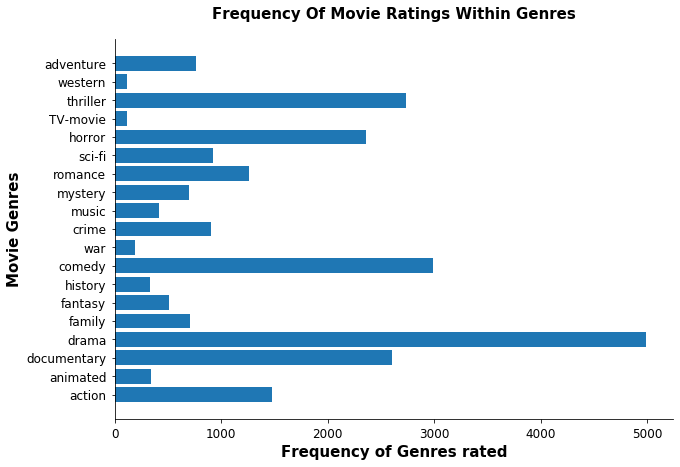

In [54]:
# Generating figure
figure3, ax = plt.subplots(figsize = (10, 7))

# generating a horizontal bar plot on the ax
x = list(genre_counter.values())
y = list(genre_counter.keys())
ax.barh(y, x)

#Setting axes labels
ax.set_xlabel('Frequency of Genres rated', fontsize = 15, weight = 'bold')
ax.set_ylabel('Movie Genres', fontsize = 15, weight = 'bold')

#adjusting tick parameter
ax.tick_params('both', labelsize = 12, pad = 5)

#setting figure title
ax.set_title('Frequency Of Movie Ratings Within Genres', pad = 20, fontsize = 15, weight = 'bold')

#Hiding top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show();

I also wanted to see if average rating of a movie is affected by the runtime of a movie. I used a subset of the sample dataset for all the movies in the sample with average ratings greater than 8. The scatterplot on the two variables shows that there is no correlation between the two variables. It can be infered from here that how long or short a movie is, is not considered when a movie viewer casts a movie rating.

In [55]:
ratings_more_than_8 = movie_ratings_info[movie_ratings_info['average_rating'] > 8]  

ratings_over_8 = ratings_more_than_8[ratings_more_than_8['number_votes'] > 50]


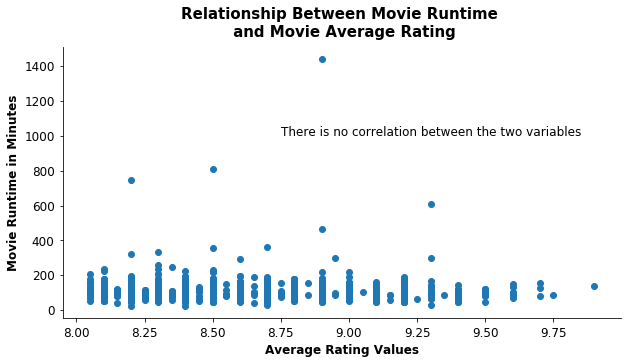

In [56]:
# Generating Figure
figure4, ax = plt.subplots(figsize = (10, 5))
# Generating scatter plot to preview variable relationship
x = ratings_over_8['average_rating']
y = ratings_over_8['runtime_minutes']
ax.scatter(x,y)

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Set axes labels
ax.set_xlabel('Average Rating Values', fontsize = 12, weight = 'bold')
ax.set_ylabel('Movie Runtime in Minutes', fontsize = 12, weight = 'bold')

# #adjusting tick parameter
ax.tick_params('both', labelsize = 12, pad = 5)

#setting figure title
ax.set_title('Relationship Between Movie Runtime \n and Movie Average Rating', pad = 10, fontsize = 15, weight = 'bold')

# # Adding explanatory text
ax.text(8.75, 1000, 'There is no correlation between the two variables', fontsize =12)

plt.show();

In [57]:
ratings_over_8['runtime_minutes'].mean()

109.01646706586827

### Evaluation

I have good confidence in my target variable as a representative of the average ratings for all movies in the industry. The light shone on the average rating for a movie can be dark or bright. To some movie viewers average rating for a movie is enough to decide on it, while others need to know more about the movie and place little significance on just the movie average rating. Regardless it is an indicator of how good or bad a movie is. 
Based on the results, I can offer Microsoft information that the genres drama, comedy, horror, thriller and documentary movies have been popular among viewers, that the expected average rating for a good movie is about 6.9, and the average runtime of a movie (on IMBD and TMDB) in the industry is about 109 minutes.

## Conclusions

In conclusion, our analysis of the data leads to the following recommendations:

1. Movies in the genres of adventure, animated, sci-fi, fantasy, action, and family have grossed the highest at the American box office. In terms of earnings these are the genres that Microsoft should explore.
2. Microsoft should hire movie crew members who have historically worked on successful movies.
3. Microsoft should also explore movies in the drama, horror, thriller, comedy and documentary genres.
4. Average runtime of movies in the industry is about 109 minutes. 

Limitations of this dataset was that it was constrained to movies in the the four source sites, that are very similar in what they offer. The dataset also was much lacking with missing values and/or null values for several observations. 

<b>Further steps </b> must be taken to seek out better data that assess the success of a movie. To be with the times of our current situation, the next steps would be to look at data from movies released in the last year to assess how the COVID pandemic affected the movie industry. Getting a dataset with less null values to improve the findings that we have made with the current dataset
